### Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Gather Data

### Gather data source 1: "twitter-archive-enhanced.csv"

In [3]:
# Import the Twitter archive csv file into a DataFrame
arch_df = pd.read_csv("twitter-archive-enhanced.csv")

### Assessing Data

After gathering data, we are now assessing data visually and programmatically for quality and tidiness.

- ### Visual Assessment of data source 1

In [4]:
print(arch_df.sample(1))

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1919  674269164442398721                    NaN                  NaN   

                      timestamp  \
1919  2015-12-08 16:47:50 +0000   

                                                 source  \
1919  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1919  This is Bob. He's a Juniper Fitzsimmons. His b...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1919                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1919  https://twitter.com/dog_rates/status/674269164...                 8   

      rating_denominator name doggo floofer pupper puppo  
1919                  10  Bob  None    None   None  None  


- ### Programmatic Assessment of data source 1

In [5]:
arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### arch_df (Twitter archive) columns:
+ **tweet_id**: the unique identifier for each tweet
+ **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
+ **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
+ **timestamp**: time when this Tweet was created
+ **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
+ **text**: actual UTF-8 text of the status update
+ **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
+ **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
+ **retweeted_status_timestamp**: time of retweet
+ **expanded_urls**: tweet URL
+ **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
+ **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
+ **name**: name of the dog
+ **doggo**: one of the 4 dogs "stage"
+ **floofer**: one of the 4 dogs "stage"
+ **pupper**: one of the 4 dogs "stage"
+ **puppo**: one of the 4 dogs "stage"

### Gather data source 2: Download tweet image predictions TSV, and write it to "image_predictions.tsv"

#### Download file using Requests library and URL

In [7]:
#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
#Import the tweet image predictions TSV file into a DataFrame
image_df=pd.read_csv('image_prediction.tsv',delimiter='\t')

- ### Visual Assessment of data source 2

In [8]:
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


- ### Programmatic Assessment of data source 2

In [9]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### image_df (tweet image predictions) columns:
- **tweet_id**: the unique identifier for each tweet
- **jpg_url**: dog's image URL
- **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: algorithm's #1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog
- **p2**: algorithm's #2 prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog
- **p3**: algorithm's #3 prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: whether or not the #3 prediction is a breed of dog

- ### Issues Found (Quality and Tidiness) of data source 1

In [10]:
arch_df.name.value_counts().sort_index(ascending=True)

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [11]:
# Check if there are any records in arch_df whose corresponding record with same tweet_id is missing in image_df table
len(arch_df[~arch_df.tweet_id.isin(image_df.tweet_id)])

281

In [12]:
# Check if there are any records in arc_df which are retweets
len(arch_df[arch_df.retweeted_status_id.isnull() == False])

181

In [13]:
# Sort by rating_denominator values
arch_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [14]:
# Sort by rating_numerator values
arch_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [15]:
# Number of records whose both doggo and floofer columns are not None
len(arch_df[(arch_df.doggo != 'None') & (arch_df.floofer != 'None')])

1

#### One record has more than one dog stage in doggo and floofer.

In [16]:
# Number of records whose both doggo and pupper columns are not None
len(arch_df[(arch_df.doggo != 'None') & (arch_df.pupper != 'None')])

12

#### Twelve records have more than one dog stage in doggo and pupper.

In [17]:
# Number of records whose both doggo and pupper columns are not None
len(arch_df[(arch_df.doggo != 'None') & (arch_df.puppo != 'None')])

1

#### One record has more than one dog stage in doggo and pupper.

In [18]:
len(arch_df[(arch_df.doggo != 'None') & (arch_df.pupper != 'None')& (arch_df.puppo != 'None')& (arch_df.floofer != 'None')])

0

#### No record has more than one dog stage in doggo, pupper, puppo & floofer

### Gather data source 3: Read tweet's JSON data line by line and convert to a DataFrame named "status_df"

#### From twitter API using Python's Tweepy library and store data

#### Tweet_json.txt

In [19]:
# Declare Twitter API keys and access tokens
# Enter your own key
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [20]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [21]:
api = tweepy.API(auth, wait_on_rate_limit=True)

- ### Visual Assessment of data source 3

In [22]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

start = time.time() # start timer

with open('getstatus_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = arch_df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))

1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

326# 833863086058651648
327# 833826103416520705
328# 833732339549220864
329# 833722901757046785
330# 833479644947025920
331# 833124694597443584
332# 832998151111966721
333# 832769181346996225
334# 832757312314028032
335# 832682457690300417
336# 832645525019123713
337# 832636094638288896
338# 832397543355072512
339# 832369877331693569
340# 832273440279240704
341# 832215909146226688
342# 832215726631055365
343# 832088576586297345
344# 832040443403784192
345# 832032802820481025
346# 831939777352105988
347# 831926988323639298
348# 831911600680497154
349# 831670449226514432
350# 831650051525054464
351# 831552930092285952
352# 831322785565769729
353# 831315979191906304
354# 831309418084069378
355# 831262627380748289
356# 830956169170665475
357# 830583320585068544
358# 830173239259324417
359# 830097400375152640
360# 829878982036299777
361# 829861396166877184
362# 829501995190984704
363# 829449946868879360
364# 829374341691346946
365# 829141528400556032
366# 829011960981237760
367# 82880155108

661# 791312159183634433
662# 791026214425268224
663# 790987426131050500
664# 790946055508652032
665# 790723298204217344
666# 790698755171364864
667# 790581949425475584
668# 790337589677002753
669# 790277117346975746
670# 790227638568808452
671# 789986466051088384
672# 789960241177853952
673# 789903600034189313
674# 789628658055020548
675# 789599242079838210
676# 789530877013393408
677# 789314372632018944
678# 789280767834746880
679# 789268448748703744
680# 789137962068021249
681# 788908386943430656
682# 788765914992902144
683# 788552643979468800
684# 788412144018661376
685# 788178268662984705
686# 788150585577050112
687# 788070120937619456
688# 788039637453406209
689# 787810552592695296
690# 787717603741622272
691# 787397959788929025
692# 787322443945877504
693# 787111942498508800
694# 786963064373534720
695# 786729988674449408
696# 786709082849828864
697# 786664955043049472
698# 786595970293370880
699# 786363235746385920
700# 786286427768250368
701# 786233965241827333
702# 78605133729

996# 748346686624440324
997# 748337862848962560
998# 748324050481647620
999# 748307329658011649
1000# 748220828303695873
1001# 747963614829678593
1002# 747933425676525569
1003# 747885874273214464
1004# 747844099428986880
1005# 747816857231626240
1006# 747651430853525504
1007# 747648653817413632
1008# 747600769478692864
1009# 747594051852075008
1010# 747512671126323200
1011# 747461612269887489
1012# 747439450712596480
1013# 747242308580548608
1014# 747219827526344708
1015# 747204161125646336
1016# 747103485104099331
1017# 746906459439529985
1018# 746872823977771008
1019# 746818907684614144
1020# 746790600704425984
1021# 746757706116112384
1022# 746726898085036033
1023# 746542875601690625
1024# 746521445350707200
1025# 746507379341139972
1026# 746369468511756288
1027# 746131877086527488
1028# 746056683365994496
1029# 745789745784041472
1030# 745712589599014916
1031# 745433870967832576
1032# 745422732645535745
1033# 745314880350101504
1034# 745074613265149952
1035# 745057283344719872
1036

1324# 706265994973601792
1325# 706169069255446529
1326# 706166467411222528
1327# 706153300320784384
1328# 705975130514706432
1329# 705970349788291072
1330# 705898680587526145
1331# 705786532653883392
1332# 705591895322394625
1333# 705475953783398401
1334# 705442520700944385
1335# 705428427625635840
1336# 705239209544720384
1337# 705223444686888960
1338# 705102439679201280
1339# 705066031337840642
1340# 704871453724954624
1341# 704859558691414016
1342# 704847917308362754
1343# 704819833553219584
1344# 704761120771465216
1345# 704499785726889984
1346# 704491224099647488
1347# 704480331685040129
1348# 704364645503647744
1349# 704347321748819968
1350# 704134088924532736
1351# 704113298707505153
1352# 704054845121142784
1353# 703774238772166656
1354# 703769065844768768
1355# 703631701117943808
1356# 703611486317502464
1357# 703425003149250560
1358# 703407252292673536
1359# 703382836347330562
1360# 703356393781329922
1361# 703268521220972544
1362# 703079050210877440
1363# 703041949650034688


1652# 683498322573824003
1653# 683481228088049664
1654# 683462770029932544
1655# 683449695444799489
1656# 683391852557561860
1657# 683357973142474752
1658# 683142553609318400
1659# 683111407806746624
1660# 683098815881154561
1661# 683078886620553216
1662# 683030066213818368
1663# 682962037429899265
1664# 682808988178739200
1665# 682788441537560576
1666# 682750546109968385
1667# 682697186228989953
1668# 682662431982772225
1669# 682638830361513985
1670# 682429480204398592
1671# 682406705142087680
1672# 682393905736888321
1673# 682389078323662849
1674# 682303737705140231
1675# 682259524040966145
1676# 682242692827447297
1677# 682088079302213632
1678# 682059653698686977
1679# 682047327939461121
1680# 682032003584274432
1681# 682003177596559360
1682# 681981167097122816
1683# 681891461017812993
1684# 681694085539872773
1685# 681679526984871937
1686# 681654059175129088
1687# 681610798867845120
1688# 681579835668455424
1689# 681523177663676416
1690# 681340665377193984
1691# 681339448655802368


1978# 672988786805112832
1979# 672984142909456390
1980# 672980819271634944
1981# 672975131468300288
1982# 672970152493887488
1983# 672968025906282496
1984# 672964561327235073
1985# 672902681409806336
1986# 672898206762672129
1987# 672884426393653248
1988# 672877615439593473
1989# 672834301050937345
1990# 672828477930868736
1991# 672640509974827008
1992# 672622327801233409
1993# 672614745925664768
1994# 672609152938721280
1995# 672604026190569472
1996# 672594978741354496
1997# 672591762242805761
1998# 672591271085670400
1999# 672538107540070400
2000# 672523490734551040
2001# 672488522314567680
2002# 672482722825261057
2003# 672481316919734272
2004# 672475084225949696
2005# 672466075045466113
2006# 672272411274932228
2007# 672267570918129665
2008# 672264251789176834
2009# 672256522047614977
2010# 672254177670729728
2011# 672248013293752320
2012# 672245253877968896
2013# 672239279297454080
2014# 672231046314901505
2015# 672222792075620352
2016# 672205392827572224
2017# 672169685991993344


2306# 666837028449972224
2307# 666835007768551424
2308# 666826780179869698
2309# 666817836334096384
2310# 666804364988780544
2311# 666786068205871104
2312# 666781792255496192
2313# 666776908487630848
2314# 666739327293083650
2315# 666701168228331520
2316# 666691418707132416
2317# 666649482315059201
2318# 666644823164719104
2319# 666454714377183233
2320# 666447344410484738
2321# 666437273139982337
2322# 666435652385423360
2323# 666430724426358785
2324# 666428276349472768
2325# 666421158376562688
2326# 666418789513326592
2327# 666411507551481857
2328# 666407126856765440
2329# 666396247373291520
2330# 666373753744588802
2331# 666362758909284353
2332# 666353288456101888
2333# 666345417576210432
2334# 666337882303524864
2335# 666293911632134144
2336# 666287406224695296
2337# 666273097616637952
2338# 666268910803644416
2339# 666104133288665088
2340# 666102155909144576
2341# 666099513787052032
2342# 666094000022159362
2343# 666082916733198337
2344# 666073100786774016
2345# 666071193221509120


In [23]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

- ### Programmatic Assessment of data source 3

In [24]:
# Save masater data of status_df
status_df.to_csv('status_df.csv', encoding='utf-8', index=False)

In [25]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
tweet_id              2339 non-null int64
retweet_count         2339 non-null int64
favorite_count        2339 non-null int64
display_text_range    2339 non-null object
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


In [26]:
status_df.sample(3)

,tweet_id,retweet_count,favorite_count,display_text_range
672,788150585577050112,1421,6538,"[0, 80]"
1752,678380236862578688,961,2527,"[0, 94]"
1332,704347321748819968,367,1654,"[0, 139]"


In [27]:
image_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
329,672082170312290304,https://pbs.twimg.com/media/CVO3KodXAAAj1de.jpg,1,hamster,0.132440,False,toy_poodle,0.123962,True,bubble,0.056212,False


In [28]:
status_df.sample(3)

,tweet_id,retweet_count,favorite_count,display_text_range
313,834089966724603904,2268,10500,"[0, 52]"
1162,719551379208073216,2032,5240,"[0, 118]"
164,858860390427611136,8250,0,"[0, 140]"


In [29]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
tweet_id              2339 non-null int64
retweet_count         2339 non-null int64
favorite_count        2339 non-null int64
display_text_range    2339 non-null object
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


#### status_df (tweet status) columns:
- **tweet_id**: the unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users
- **display_text_range**: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

- ### Issue Found (Quality and Tidiness) of data source 3

### Quality
#### arch_df (Twitter archive) table
- Incorrect datatype of **tweet_ID**.
- Incorrect datatype of **in_reply_to_status_id,in_reply_to_user_id**
- contains retweets, as we only want original ratings (no retweets).So the retweets shouldn't be there
- duplicates many tweet_id(s) of arch_df table, in which they are missing in image_df (image predictions) table. We only want ratings with images. But not all ratings have images.
- erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id and timestamp columns) for timestamp
- unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>
- text column contains untruncated text instead of displayable text
- rating_numerator column has values less than 10 as well as some very large numbers (e.g. 1176)
- rating_denominator column has values other than 10
- erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)
- some records have more than one dog stage
- nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
- some dog names are not correct.

### Cleaning for arch_df table

In [30]:
# Count of retweet status id
len(arch_df[arch_df.retweeted_status_id.isnull() == False])

181

In [31]:
# Duplicate arch_df for cleaning
arch_clean = arch_df.copy()

### Issue 1 

### **Define** 
#### 1) Keep original tweets and remove retweets at arch_clean dateframe

### Code

In [32]:
arch_clean = arch_clean[arch_clean.retweeted_status_id.isnull()]

### Test

In [33]:
#Checking
len(arch_clean[arch_clean.retweeted_status_id.isnull() == False])

0

### **Define** 
#### 2) Keep those tweet_id records in arc_df table where they are also existed in image_df table

### Code

In [34]:
arch_clean = arch_clean[arch_clean.tweet_id.isin(image_df.tweet_id)]

### Test

In [35]:
#Checking
len(arch_clean[~arch_clean.tweet_id.isin(image_df.tweet_id)])

0

### Tidiness

- **arch_df** remove any duplicates **retweeted_status_id**, **retweeted_status_user_id** and **retweeted_status_timestamp** columns.
- **doggo**, **floofer**, **pupper** and **puppo** columns in **arch_df** table could be merged into one column named as **stage**.
- **breed** column could be added in **arc_df** table as its values based on **p1_conf** and **p1_dog** columns of **image_df** (image predictions) table.
- **retweet_count** and **favorite_count** columns from **status_df** (tweet status) table should be joined with **arch_df** table

In [36]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

### Define
#### 1) Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from arc_df table

### Code

In [37]:
#Remove three columns "retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
arch_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [38]:
#Checking
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


### Quality

### Define
#### 1) Convert **in_reply_to_status_id** and **in_reply_to_user_id** to **integer  data type**. Convert **timestamp** to **datetime data type**

### Code

In [39]:
#Replace all NaN elements with 0
arch_clean.in_reply_to_status_id = arch_clean.in_reply_to_status_id.fillna(0)
arch_clean.in_reply_to_user_id = arch_clean.in_reply_to_user_id.fillna(0)
#Convert float64 column to int64
arch_clean.in_reply_to_status_id = arch_clean.in_reply_to_status_id.astype(np.int64)
arch_clean.in_reply_to_user_id = arch_clean.in_reply_to_user_id.astype(np.int64)
#Convert pandas column to datetime
arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)

### Test

In [40]:
#Checking
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


### Define
#### 2) Remove all html anchor tags (i.e. <a..></a>) in source column and retain the text in between the tags. Convert source column from string to category.

### Code

In [41]:
#remove html anchor tags
arch_clean.source = arch_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [42]:
#convert source column from object to category.
arch_clean.source = arch_clean.source.astype('category')

### Test

In [43]:
#Checking
arch_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [44]:
arch_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1363,702932127499816960,0,0,2016-02-25 19:04:13,Twitter for iPhone,This is Chip. He's an Upper West Nile Pantaloo...,https://twitter.com/dog_rates/status/702932127...,6,10,Chip,None,None,None,None
1388,700462010979500032,0,0,2016-02-18 23:28:52,Twitter for iPhone,This is Murphy. He's a mini golden retriever. ...,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,None,None,None,None
390,826240494070030336,0,0,2017-01-31 01:27:39,Twitter for iPhone,We only rate dogs. Please don't send in any mo...,https://twitter.com/dog_rates/status/826240494...,11,10,None,None,None,None,None


### Define
#### 3) At status_df table, extract displayable text from text column

In [45]:
# Before extraction: untruncated text of first 3 records
print(arch_clean.iloc[0].text)
print(arch_clean.iloc[1].text)
print(arch_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [46]:
# merge status_df display_text_range column to arch_clean to extract text using range values
arch_clean = pd.merge(arch_clean, status_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [47]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 15 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    1991 non-null int64
in_reply_to_user_id      1991 non-null int64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null category
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
doggo                    1991 non-null object
floofer                  1991 non-null object
pupper                   1991 non-null object
puppo                    1991 non-null object
display_text_range       1991 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(8)
memory usage: 235.4+ KB


In [48]:
arch_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,display_text_range
117,863432100342583297,0,0,2017-05-13 16:33:49,Twitter for iPhone,This is Belle. She's never been more pupset. E...,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None,"[0, 128]"
1199,690932576555528194,0,0,2016-01-23 16:22:17,Twitter for iPhone,This is Buddy. He's testing out the water. Suc...,https://twitter.com/dog_rates/status/690932576...,12,10,Buddy,None,None,None,None,"[0, 100]"
1587,673707060090052608,0,0,2015-12-07 03:34:14,Twitter for iPhone,This is Raymond. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None,"[0, 116]"


### Code

In [49]:
# using display_text_range of arch_clean, extract displayable text
for i, row in arch_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    arch_clean.set_value(i, 'text', display_text)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [50]:
# drop display_text_range column
arch_clean.drop('display_text_range', axis=1, inplace=True)

### Test

In [51]:
#Checking
# After extraction: first 3 records now show displayable text
print(arch_clean.iloc[0].text)
print(arch_clean.iloc[1].text)
print(arch_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


### Define
#### 4) Replace all lowercase value of name into "None" in "arch_clean" dataframe

### Code

In [52]:
# Replace all lowercase value of name into "None"
arch_clean['name'][arch_clean['name'].str.match('[a-z]+')] = 'None'

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test

In [53]:
#Checking
arch_clean.name[arch_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [54]:
# Sort ascending by name to check if there are any names starting with a lowercase alphabet
arch_clean.name.value_counts().sort_index(ascending=True)

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Waffles         3
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke            3
Zeus      

### Define
#### 5) Some records have more than one dog stages in "arch_clean" dataframe

### Code

In [55]:
# Check no. of records are more than one dog stages
print(len(arch_clean[(arch_clean.doggo != 'None') & (arch_clean.floofer != 'None')]))
print(len(arch_clean[(arch_clean.doggo != 'None') & (arch_clean.puppo != 'None')]))
print(len(arch_clean[(arch_clean.doggo != 'None') & (arch_clean.pupper != 'None')]))

1
1
9


There is one record has both doggo and floofer;
One record has both doggo and puppo;
Nine records have both doggo and pupper;

In [56]:
# Identify which two records have both doggo and floofer & doggo and puppo
for i, row in arch_clean[((arch_clean.doggo != 'None') & (arch_clean.floofer != 'None'))
                   | ((arch_clean.doggo != 'None') & (arch_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs



In [57]:
# From above results, doggo should be set as None for these two records
arch_clean['doggo'][arch_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
# We also set pupper column as None for records which have both doggo and pupper
arch_clean['pupper'][(arch_clean.doggo != 'None') & (arch_clean.pupper != 'None')] = 'None'

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test

In [59]:
#Checking
len(arch_clean[((arch_clean.doggo != 'None') & (arch_clean.pupper != 'None'))
                  | ((arch_clean.doggo != 'None') & (arch_clean.floofer != 'None')) 
                  | ((arch_clean.doggo != 'None') & (arch_clean.puppo != 'None'))])

0

#### After cleaning, no record has more than one dog stages.

### Tidiness

### Define
#### 1) In arc_df table, merge doggo, floofer, pupper and puppo columns into one column named as "stage"

### Code

In [60]:
# No. of counts in doggo
arch_clean.doggo.value_counts()

None     1919
doggo      72
Name: doggo, dtype: int64

In [61]:
# No. of counts in floofer
arch_clean.floofer.value_counts()

None       1983
floofer       8
Name: floofer, dtype: int64

In [62]:
# No. of counts in pupper
arch_clean.pupper.value_counts()

None      1788
pupper     203
Name: pupper, dtype: int64

In [63]:
# No. of counts in puppo
arch_clean.puppo.value_counts()

None     1968
puppo      23
Name: puppo, dtype: int64

Merge doggo, floofer, pupper and puppo columns into one column named as "stage". 
Convert the datatype from string to categorical which saves memory.

In [64]:
# merge doggo, floofer, pupper and puppo columns to stage column
arch_clean['stage'] = arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [65]:
# convert the datatype from string to categorical
arch_clean.stage = arch_clean.stage.astype('category')

In [66]:
# drop the doggo, floofer, pupper and puppo columns
arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [67]:
#Checking
arch_clean.stage.value_counts()

None       1685
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

In [68]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 11 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    1991 non-null int64
in_reply_to_user_id      1991 non-null int64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null category
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
stage                    1991 non-null category
dtypes: category(2), datetime64[ns](1), int64(5), object(3)
memory usage: 239.7+ KB


### Define
#### 2) Create breed, retweet_count and favorite_count columns in arc_df table;
#### For each tweet_id, use the image_df table to check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True. If it is true, set the value of p1 column in breed column.

### Code

In [69]:
# create breed, retweet_count and favorite_count columns
arch_clean['breed'] = 'None'
arch_clean['retweet_count'] = 0
arch_clean['favorite_count'] = 0

In [70]:
# iterate through all the rows of arch_clean
for i, row in arch_clean.iterrows():
    # transfer retweet_count and favorite_count columns at status_df table and assign those values
    arch_clean.set_value(i, 'retweet_count', status_df[status_df.tweet_id == row.tweet_id].retweet_count.iloc[0])
    arch_clean.set_value(i, 'favorite_count', status_df[status_df.tweet_id == row.tweet_id].favorite_count.iloc[0])    
    image_prediction = image_df[image_df.tweet_id == row.tweet_id]
    p1_conf = image_prediction.p1_conf.iloc[0]
    p1_dog = image_prediction.p1_dog.iloc[0]
    #  check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True
    # set the value of p1 column in breed column.
    if p1_conf >= 0.95 and p1_dog:
        arch_clean.set_value(i, 'breed', image_prediction.p1.iloc[0])

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


### Test

In [71]:
# Checking: Counts of breed
arch_clean.breed.value_counts()

None                           1807
pug                              20
Pembroke                         19
Samoyed                          18
golden_retriever                 16
Pomeranian                       13
Chihuahua                         9
Labrador_retriever                8
French_bulldog                    8
chow                              7
Bernese_mountain_dog              4
German_shepherd                   4
Shetland_sheepdog                 4
beagle                            3
Old_English_sheepdog              3
Pekinese                          3
Blenheim_spaniel                  3
malamute                          2
basset                            2
dalmatian                         2
Boston_bull                       2
keeshond                          2
bull_mastiff                      2
English_springer                  2
komondor                          2
Saint_Bernard                     2
vizsla                            2
cocker_spaniel              

In [72]:
arch_clean[['tweet_id', 'retweet_count', 'favorite_count']].sample(3)

,tweet_id,retweet_count,favorite_count
444,796387464403357696,4547,11710
1322,683111407806746624,966,3532
65,877736472329191424,18607,77878


In [73]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 14 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    1991 non-null int64
in_reply_to_user_id      1991 non-null int64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null category
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
stage                    1991 non-null category
breed                    1991 non-null object
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
dtypes: category(2), datetime64[ns](1), int64(7), object(4)
memory usage: 286.4+ KB


### Save master data

In [74]:
# Save masater data
arch_clean.to_csv('twitter_arch_master.csv', encoding='utf-8', index=False)

### Data Analysis

In [75]:
# create a copy for data analysis
df = arch_clean.copy()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 14 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    1991 non-null int64
in_reply_to_user_id      1991 non-null int64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null category
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
stage                    1991 non-null category
breed                    1991 non-null object
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
dtypes: category(2), datetime64[ns](1), int64(7), object(4)
memory usage: 206.4+ KB


#### Question 1: When is the most people to tweet post of WeRateDogs?

In [77]:
#Analyze no. of tweets posted by months and years
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     87
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

### Insight 1
#### Most of tweets posted by WeRateDogs are between Nov 2015 and Mar 2016.

### Question 2: What is the most popular device for posting WeRateDogs?

In [78]:
# Counts of source
df['source'].value_counts()

Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Insight 2
#### More than 98% users are using iPhone for posting WeRateDogs Twitter.

### Question 3: How many counts of rating (numerator) is greater than 10 in posting WeRateDogs?

In [79]:
# Rating of dogs
df['rating_numerator'].value_counts().sort_index()

0         2
1         5
2         9
3        19
4        16
5        33
6        32
7        52
8        95
9       151
10      418
11      396
12      449
13      260
14       35
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [80]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

1159

### Insight 3
#### There are 1159 counts of rating (numerator) is greater than 10 which is contributed more than 58%. 

### Question 4: What is the most popular dog breeds in posting WeRateDogs?

In [81]:
# Counts of dog breed
df['breed'].value_counts()

None                           1807
pug                              20
Pembroke                         19
Samoyed                          18
golden_retriever                 16
Pomeranian                       13
Chihuahua                         9
Labrador_retriever                8
French_bulldog                    8
chow                              7
Bernese_mountain_dog              4
German_shepherd                   4
Shetland_sheepdog                 4
beagle                            3
Old_English_sheepdog              3
Pekinese                          3
Blenheim_spaniel                  3
malamute                          2
basset                            2
dalmatian                         2
Boston_bull                       2
keeshond                          2
bull_mastiff                      2
English_springer                  2
komondor                          2
Saint_Bernard                     2
vizsla                            2
cocker_spaniel              

### Insight 4
#### Around 90% cannot identify their breed. Top 3 breed come from pug, Pembroke & Samoyed.

### Question 5: What is the mean counts of Retweet and Favorite in posting WeRateDogs?

In [82]:
# Mean of Retweet and Favourite Counts
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite_count.mean())))

Mean Retweet Count	2629
Mean Favorite Count	8664


### Insight 5
#### Mean Retweet Count and Mean Favorite Count are 2630 and 8667, respectively.

### Question 6: What is the popular stage in posting WeRateDogs?

In [83]:
# Counts of stage
df['stage'].value_counts()

None       1685
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

### Insight 6
#### Around 85% cannot identify their stage. While Pupper is contributed the most.

### Visualization 

#### Trend of WeRateDogs

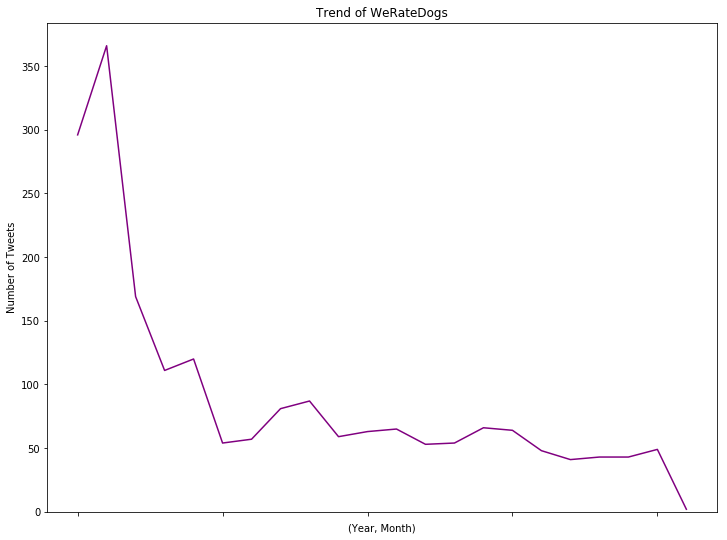

In [84]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
# Plot of no. of tweets over time
# Group by years and months
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='Trend of WeRateDogs',color='purple')
ax.set_xlabel('(Year, Month)')
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )

plt.savefig('tweet_trend')

#### Distribution of Dog Rating

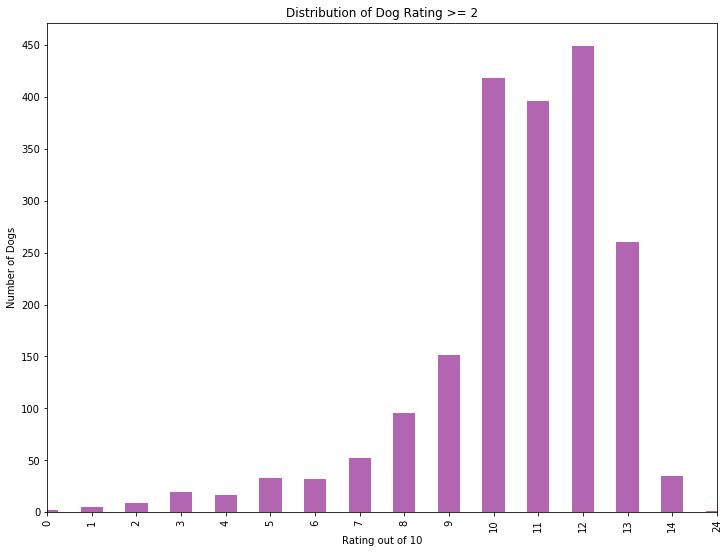

In [85]:
# rating_distribution
ax = df.rating_numerator.value_counts().sort_index().plot('bar', title = 'Distribution of Dog Rating >= 2', color='purple', alpha= 0.6)
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
ax.set_xlim(0, 15)
plt.savefig('rating_distribution')

#### Trend of Retweet and Favorite

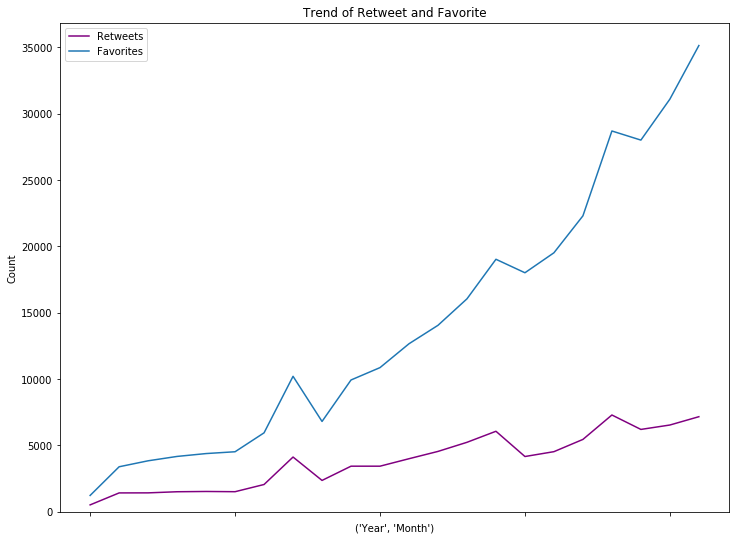

In [86]:
# Trend of Retweet and Favorite
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line', color='purple')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Trend of Retweet and Favorite')
plt.ylabel('Count')
plt.xlabel(('Year', 'Month'))
plt.legend(('Retweets', 'Favorites'))
plt.savefig('retweet_favarite')

#### twitter_source

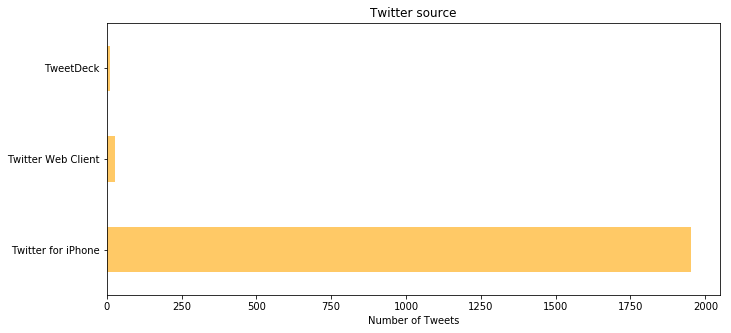

In [87]:
df['source'].value_counts().plot('barh', figsize=(11,5), color='orange', alpha= 0.6,title='Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

#### Dog breed

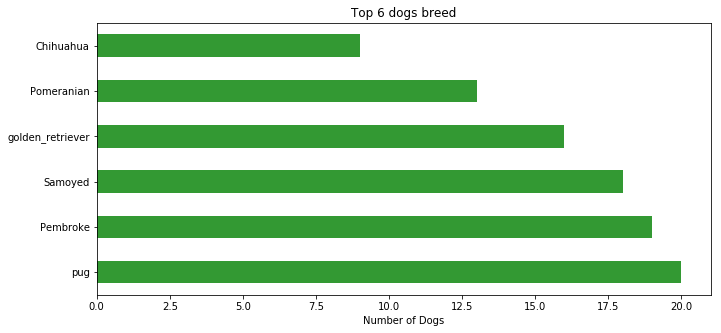

In [88]:
# Top 6 dogs breed
df.breed.value_counts()[1:7].plot('barh', color='green', alpha= 0.8,figsize=(11,5), title='Top 6 dogs breed').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

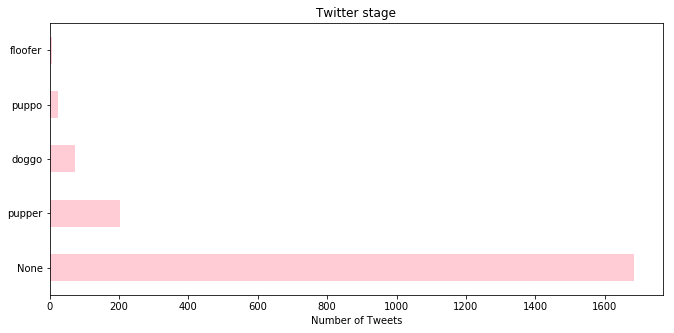

In [89]:
df['stage'].value_counts().plot('barh', figsize=(11,5), color='pink', alpha= 0.8,title='Twitter stage').set_xlabel("Number of Tweets")
plt.savefig('twitter_stage')

#### Correlation map

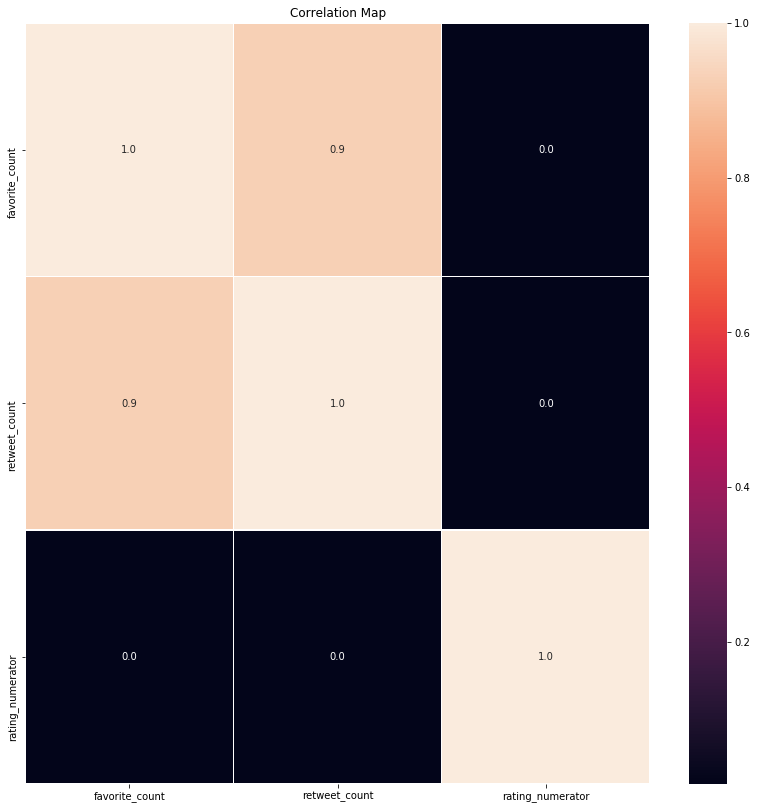

In [90]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df[['favorite_count',
                       'retweet_count', 
                       'rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')
plt.savefig('CorrelationMap')